**CNN WHITE BLOOD CELLS CLASSIFICATION ALGORITHM**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import listdir
import cv2
import glob
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


In [ ]:
data = []
folder_dir = "drive/My Drive/Raabin - WBC/crop_dataset/"
count = 0
for wbc in os.listdir(folder_dir):
    count=0
    for images in os.listdir(folder_dir+"/"+wbc):
        data.append([folder_dir+"/"+wbc+"/"+images,wbc])
data1 = pd.DataFrame(data,columns=['images','Category'])
data1.head()

,images,Category
0,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
1,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
2,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
3,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
4,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil


In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in pbar(data1['images']):

    lables.append(data1['Category'][c])

    img = cv2.imread(image)
    data.append(img)
    c=c+1

100% (60 of 60) |########################| Elapsed Time: 0:00:26 Time:  0:00:26


In [ ]:
data = np.load("drive/My Drive/Raabin - WBC/data.npy")
lables = np.load("drive/My Drive/Raabin - WBC/lable.npy")

In [ ]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
lables_df = pd.DataFrame(np.unique(lables))
le = LabelEncoder()
lables = le.fit_transform(lables)
lb = LabelBinarizer()
one_hot = lb.fit_transform(lables)

In [ ]:
(trainX, testX, trainY, testY ) = train_test_split(data, one_hot, test_size= 0.25,random_state=42)
trainX = trainX/255
testX = testX/255

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top of the VGG19 base
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Assuming 4 output classes, adjust based on your task
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24113284 (91.98 MB)
Trainable params: 52557

In [ ]:
hist = model.fit(trainX, trainY, epochs=10,validation_data=(testX,testY))

Epoch 1/10
130/130 [==============================] - 178s 1s/step - loss: 1.0421 - accuracy: 0.5476 - val_loss: 0.7788 - val_accuracy: 0.6428
Epoch 2/10
130/130 [==============================] - 152s 1s/step - loss: 0.7696 - accuracy: 0.6754 - val_loss: 0.6567 - val_accuracy: 0.7296
Epoch 3/10
130/130 [==============================] - 150s 1s/step - loss: 0.6912 - accuracy: 0.7097 - val_loss: 0.6166 - val_accuracy: 0.7570
Epoch 4/10
130/130 [==============================] - 151s 1s/step - loss: 0.6428 - accuracy: 0.7237 - val_loss: 0.5795 - val_accuracy: 0.7498
Epoch 5/10
130/130 [==============================] - 150s 1s/step - loss: 0.6235 - accuracy: 0.7388 - val_loss: 0.5485 - val_accuracy: 0.7946
Epoch 6/10
130/130 [==============================] - 150s 1s/step - loss: 0.5975 - accuracy: 0.7521 - val_loss: 0.5426 - val_accuracy: 0.7918
Epoch 7/10
130/130 [==============================] - 151s 1s/step - loss: 0.5911 - accuracy: 0.7497 - val_loss: 0.5889 - val_accuracy: 0.7650

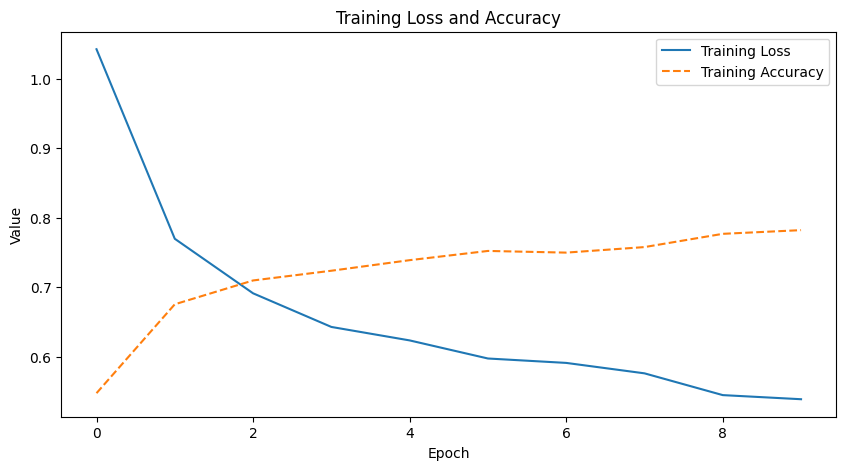

In [ ]:
# Plotting Loss and Accuracy in a single graph
plt.figure(figsize=(10, 5))

# Plotting Loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Plotting Accuracy on the same graph
plt.plot(hist.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Display legend
plt.legend()

# Display the plot
plt.show()

In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.8 MB/s eta 0:00:00


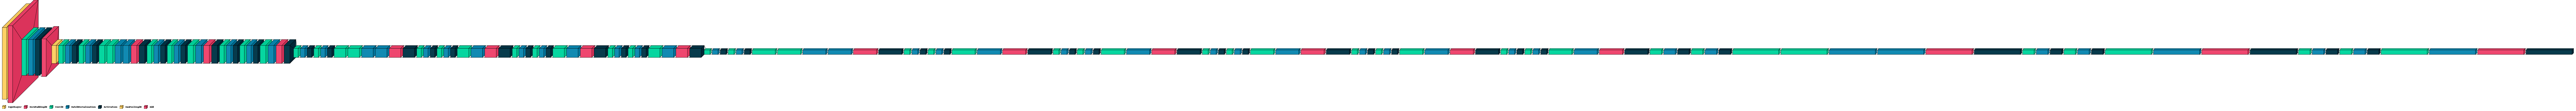

In [3]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(base_model, legend=True)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes
print("Classification Report: \n", classification_report([np.argmax(element) for element in testY], y_pred_classes))

44/44 [==============================] - 37s 807ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       353
           1       0.95      0.85      0.90       323
           2       0.64      0.81      0.72       336
           3       0.96      0.80      0.87       371

    accuracy                           0.79      1383
   macro avg       0.81      0.79      0.79      1383
weighted avg       0.81      0.79      0.79      1383



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(trainX)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes
print("Classification Report: \n", classification_report([np.argmax(element) for element in trainY], y_pred_classes))

130/130 [==============================] - 108s 831ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1142
           1       0.95      0.84      0.89       855
           2       0.65      0.82      0.72      1022
           3       0.97      0.81      0.89      1128

    accuracy                           0.79      4147
   macro avg       0.82      0.80      0.80      4147
weighted avg       0.81      0.79      0.80      4147



44/44 [==============================] - 36s 824ms/step
Accuracy: 0.79


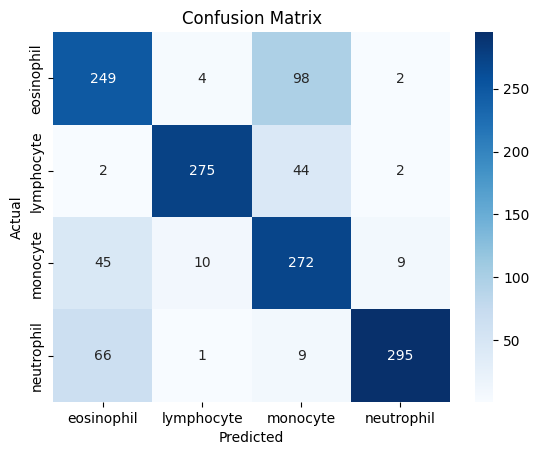

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_pred = model.predict(testX)
# Evaluate accuracy
y_pred = le.inverse_transform([np.argmax(element) for element in y_pred])

accuracy = accuracy_score(le.inverse_transform([np.argmax(element) for element in testY]), y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create confusion matrix
conf_mat = confusion_matrix(le.inverse_transform([np.argmax(element) for element in testY]),y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(lables_df[0]), yticklabels=np.unique(lables_df[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()